In [1]:
%%configure -f
{"executorMemory": "4G","driverMemory":"8G","executorCores": 1,"numExecutors": 3, 
 "conf": {"spark.dynamicAllocation.enabled": "false", 
          "spark.sql.parquet.enableVectorizedReader": "false", 
          "spark.pyspark.python": "python3",
          "spark.pyspark.virtualenv.enabled": "true",
          "spark.pyspark.virtualenv.type": "native",
          "spark.pyspark.virtualenv.bin.path": "/usr/bin/virtualenv"}}

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').config("spark.driver.memory", "2g").appName('spark_ppp_data').getOrCreate()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
198,application_1681238404028_0253,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
spark_df = spark.read.options(delimiter=',', header=True, inferSchema=True, multiLine=True, escape='\"')\
        .csv("s3://msbx5420-spr23/team_10/public_150k_plus_230101.csv")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
type(spark_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.sql.dataframe.DataFrame'>

# ***Data Cleanup***

In [5]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("missingno")
sc.install_pypi_package("matplotlib")
sc.install_pypi_package("seaborn")
sc.install_pypi_package("plotly")
sc.install_pypi_package("pylab")
sc.install_pypi_package("numpy")


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…













ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab


In [6]:
# Loading all the packages needed for the analysis
import pandas as pd                           #pandas for data wrangling/preparation
import missingno as msno                      #Python library for the exploratory visualization of missing data
import matplotlib.pyplot as plt               #library for matplotlib visualization
import matplotlib.dates as mdates             #for time series plot
import seaborn as sns                         #library for seaborn visualization
import plotly.express as px                   #library for plotly visualization
from pylab import rcParams 
import numpy as np

rcParams['figure.figsize'] = 10,8             #setting default size of the plot
sns.set(font_scale = 1.2, style = 'ticks')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
## Only use on google colab
# from google.colab import drive
# drive.mount('/content/drive')
# ppp_df = pd.read_csv('/content/drive/MyDrive/CU BOULDER/public_150k_plus_230101.csv')

In [7]:
# ppp_df = pd.read_csv('/content/public_150k_plus_230101.csv')
# Convert pyspark df to pandas df for wrangling first.
ppp_df = spark_df.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
len(ppp_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

968531

In [9]:
ppp_df.head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   LoanNumber DateApproved  ...  ForgivenessAmount ForgivenessDate
0  9547507704   05/01/2020  ...          773553.37      11/20/2020
1  9777677704   05/01/2020  ...          746336.24      08/12/2021
2  5791407702   05/01/2020  ...          696677.49      02/10/2021
3  6223567700   05/01/2020  ...          395264.11      09/10/2021
4  9662437702   05/01/2020  ...          370819.35      04/08/2021

[5 rows x 53 columns]

In [ ]:
ppp_df.tail()

In [10]:
# Overview of the Dataframe
ppp_df.info()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int32  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968531 non-null  object 
 5   BorrowerAddress              968531 non-null  object 
 6   BorrowerCity                 968531 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               930864 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int32  
 12  SBAGuarantyPercentage        968531 non-null  int32  
 13 

In [11]:
# Now, Dropping the columns from this dataframes which are biased, having many null/NaN/NA values and data that are not relevant for this analysis.
# Using the drop function using the index provided above in info()
ppp_df.drop(ppp_df.columns[[2, 5, 6, 8, 9, 12, 15, 16, 17, 19, 20, 21, 22, 25, 27, 28, 29, 30, 31, 33, 34, 
                            35, 36, 38, 39, 40, 41, 42, 44, 46, 47, 48, 49, 50]], axis = 1, inplace = True)

# Viewing to confirm whether the changes are done or not.
ppp_df.info()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LoanNumber              968531 non-null  int64  
 1   DateApproved            968531 non-null  object 
 2   ProcessingMethod        968531 non-null  object 
 3   BorrowerName            968531 non-null  object 
 4   BorrowerState           968518 non-null  object 
 5   LoanStatus              968531 non-null  object 
 6   Term                    968531 non-null  int32  
 7   InitialApprovalAmount   968531 non-null  float64
 8   CurrentApprovalAmount   968531 non-null  float64
 9   ServicingLenderName     968531 non-null  object 
 10  RuralUrbanIndicator     968531 non-null  object 
 11  HubzoneIndicator        968531 non-null  object 
 12  BusinessAgeDescription  968530 non-null  object 
 13  JobsReported            968530 non-null  float64
 14  PAYROLL_PROCEED     

In [ ]:
# Head of the dataframe after droping columns.
ppp_df.head()

In [12]:
# Changing the datatype of the date columns from object/string(MM/DD/YYYY) to datetime64(YYYY-MM-DD)
ppp_df[['DateApproved', 'ForgivenessDate']] = ppp_df[['DateApproved', 'ForgivenessDate']].apply(pd.to_datetime)
ppp_df.info()
ppp_df.head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   LoanNumber              968531 non-null  int64         
 1   DateApproved            968531 non-null  datetime64[ns]
 2   ProcessingMethod        968531 non-null  object        
 3   BorrowerName            968531 non-null  object        
 4   BorrowerState           968518 non-null  object        
 5   LoanStatus              968531 non-null  object        
 6   Term                    968531 non-null  int32         
 7   InitialApprovalAmount   968531 non-null  float64       
 8   CurrentApprovalAmount   968531 non-null  float64       
 9   ServicingLenderName     968531 non-null  object        
 10  RuralUrbanIndicator     968531 non-null  object        
 11  HubzoneIndicator        968531 non-null  object        
 12  BusinessAgeDescription  968530

In [13]:
# Checking how many columns have NA/NaN/Null values and caluculating total NA values for all columns
ppp_df.isna().sum()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

LoanNumber                    0
DateApproved                  0
ProcessingMethod              0
BorrowerName                  0
BorrowerState                13
LoanStatus                    0
Term                          0
InitialApprovalAmount         0
CurrentApprovalAmount         0
ServicingLenderName           0
RuralUrbanIndicator           0
HubzoneIndicator              0
BusinessAgeDescription        1
JobsReported                  1
PAYROLL_PROCEED            1832
BusinessType                722
OriginatingLender             0
ForgivenessAmount         29646
ForgivenessDate           29646
dtype: int64

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

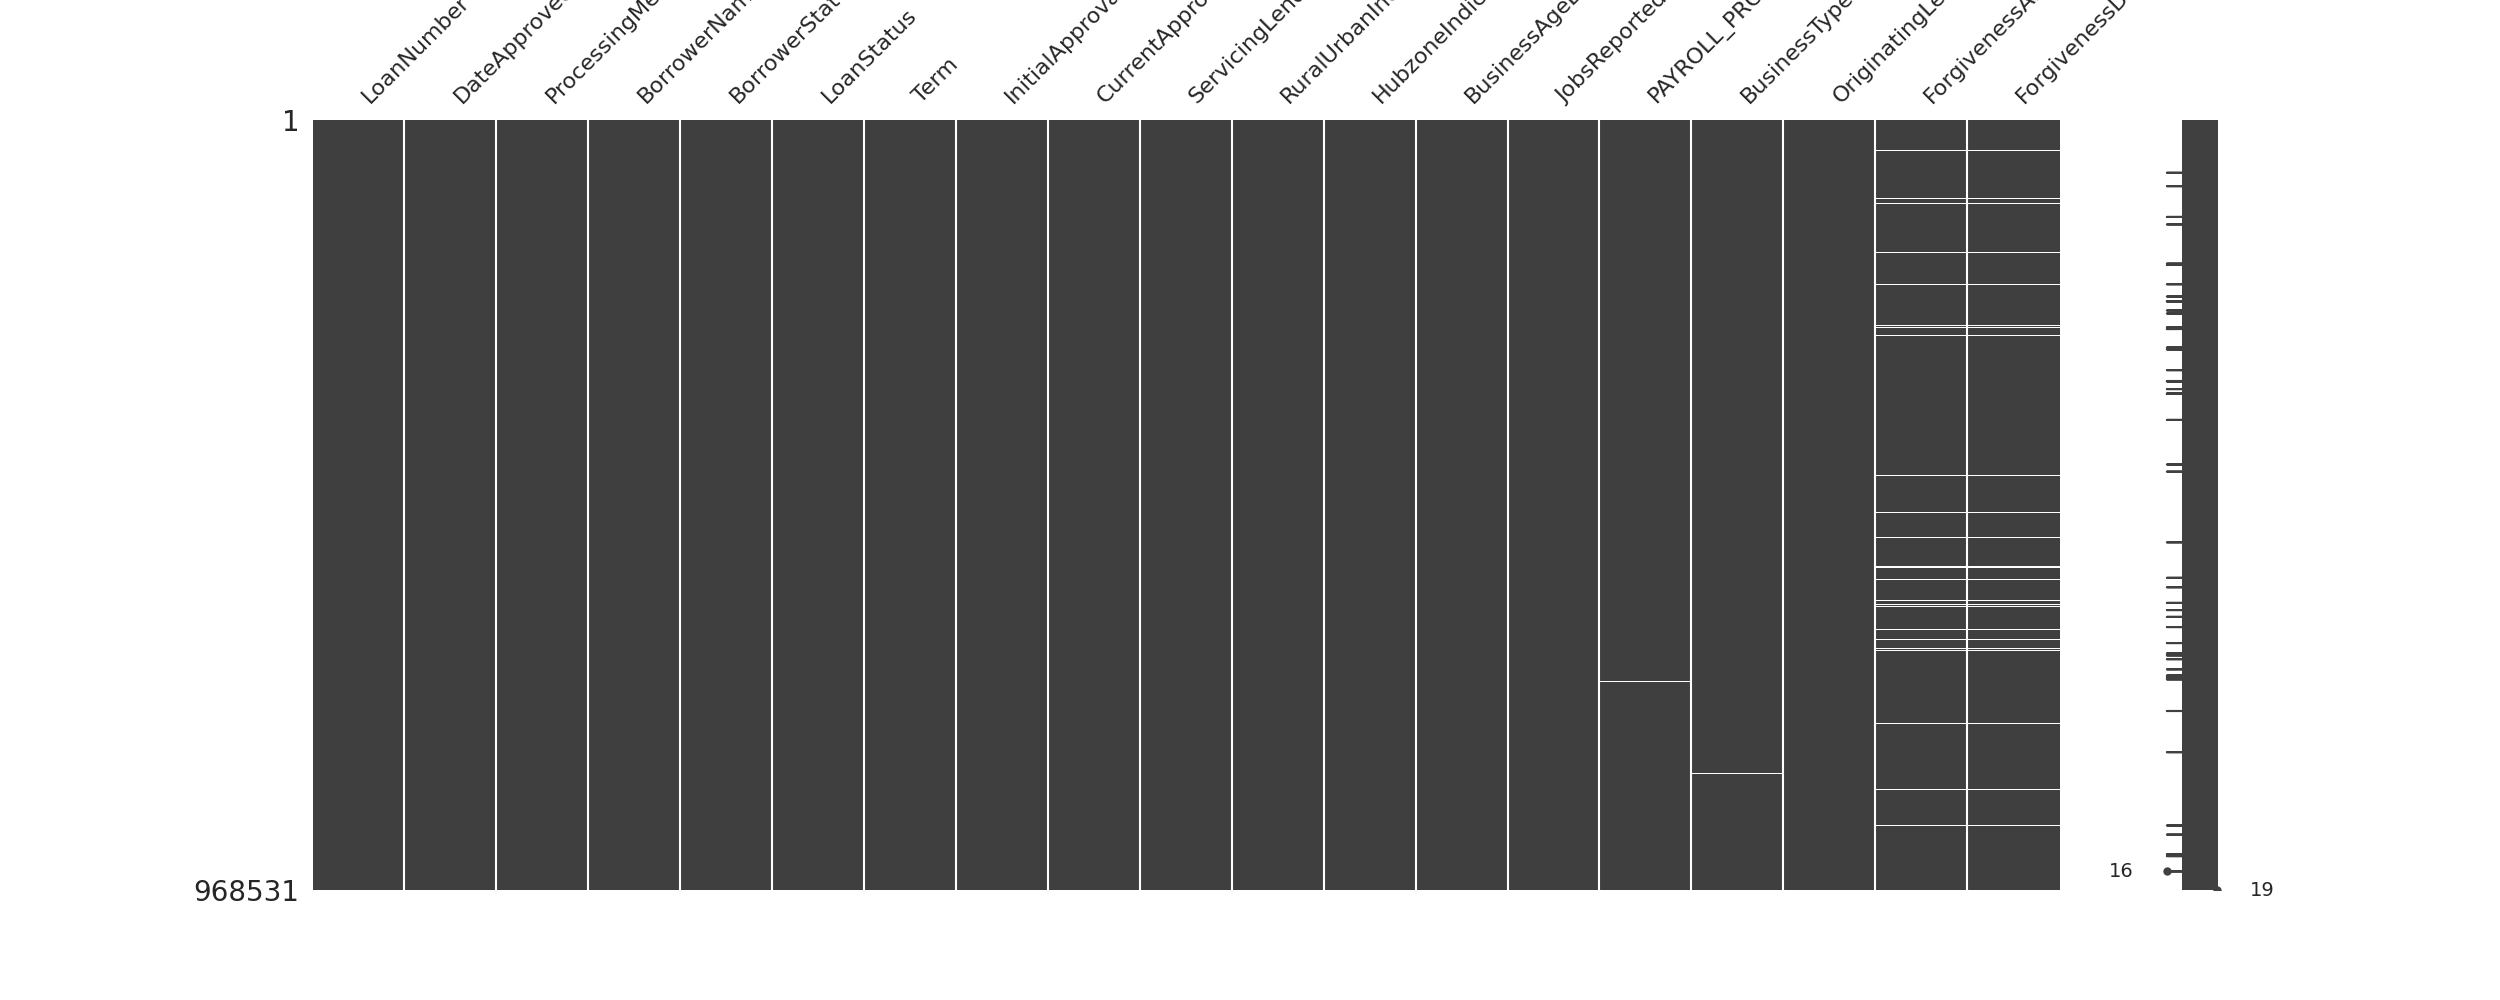

In [14]:
# Using the matrix method of missing no to view all NA values.
msno.matrix(ppp_df)
plt.show()
%matplot plt

In [15]:
# Dropping all NA values in the dataframe
ppp_df.dropna(inplace = True)

# Resetting the index after droping NA values
ppp_df.reset_index(inplace = True, drop = True)
ppp_df.info()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936371 entries, 0 to 936370
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   LoanNumber              936371 non-null  int64         
 1   DateApproved            936371 non-null  datetime64[ns]
 2   ProcessingMethod        936371 non-null  object        
 3   BorrowerName            936371 non-null  object        
 4   BorrowerState           936371 non-null  object        
 5   LoanStatus              936371 non-null  object        
 6   Term                    936371 non-null  int32         
 7   InitialApprovalAmount   936371 non-null  float64       
 8   CurrentApprovalAmount   936371 non-null  float64       
 9   ServicingLenderName     936371 non-null  object        
 10  RuralUrbanIndicator     936371 non-null  object        
 11  HubzoneIndicator        936371 non-null  object        
 12  BusinessAgeDescription  936371

In [16]:
# Checking if there are any duplicate values present in the dataframe
ppp_df.duplicated().sum()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0

In [17]:
# Checking for unique values in columns which are limited to certain data only.
column_list = [2, 5, 10, 11, 12, 15]

for i in column_list:
    print(f'\033[1m{ppp_df.columns[i]} : \033[0m\n {ppp_df[ppp_df.columns[i]].unique()}')
# \033[1m, \033[0m - to start, end bold

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

ProcessingMethod : 
 ['PPP' 'PPS']
LoanStatus : 
 ['Paid in Full' 'Exemption 4']
RuralUrbanIndicator : 
 ['U' 'R']
HubzoneIndicator : 
 ['Y' 'N']
BusinessAgeDescription : 
 ['Existing or more than 2 years old' 'Unanswered'
 'New Business or 2 years or less' 'Change of Ownership'
 'Startup, Loan Funds will Open Business']
BusinessType : 
 ['Limited  Liability Company(LLC)' 'Non-Profit Organization' 'Corporation'
 '501(c)3 – Non Profit' 'Subchapter S Corporation' 'Cooperative'
 'Partnership' 'Professional Association' 'Sole Proprietorship'
 'Employee Stock Ownership Plan(ESOP)' 'Limited Liability Partnership'
 'Non-Profit Childcare Center' 'Trust' 'Joint Venture'
 '501(c)6 – Non Profit Membership' 'Self-Employed Individuals'
 'Single Member LLC' 'Independent Contractors' 'Tribal Concerns'
 'Tenant in Common' 'Housing Co-op' 'Rollover as Business Start-Ups (ROB'
 '501(c) – Non Profit except 3,4,6,' 'Qualified Joint-Venture (spouses)'
 '501(c)19 – Non Profit Veterans']

In [18]:
ppp_df.describe()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         LoanNumber           Term  ...  PAYROLL_PROCEED  ForgivenessAmount
count  9.363710e+05  936371.000000  ...     9.363710e+05       9.363710e+05
mean   5.431837e+09      36.335961  ...     5.138117e+05       5.282153e+05
std    2.548778e+09      17.128330  ...     7.081321e+05       7.309820e+05
min    1.000007e+09       0.000000  ...     0.000000e+00       1.000000e-02
25%    3.281762e+09      24.000000  ...     1.958395e+05       2.008177e+05
50%    5.407547e+09      24.000000  ...     2.875000e+05       2.950646e+05
75%    7.547842e+09      60.000000  ...     5.252952e+05       5.395694e+05
max    9.999007e+09     180.000000  ...     1.000000e+07       1.026528e+07

[8 rows x 7 columns]

In [ ]:
# Exporting the cleaned dataframe in a csv file
# ppp_df.to_csv('/content/drive/MyDrive/CU BOULDER/public_150k_plus_cleaned.csv')
# ppp_df.to_csv('./public_150k_plus_cleaned.csv')

# ***Exploratory Data Analysis (EDA) and Visualization***

In [19]:
# Checking the loan amount min and max values
print(ppp_df['CurrentApprovalAmount'].min(), ppp_df['CurrentApprovalAmount'].max())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

150000.0 10000000.0

In [20]:
# min is 150K and max is 10M, so creating a category for a range of loan amount.
ppp_df['LoanRange'] = pd.cut(ppp_df['CurrentApprovalAmount'], 
                             bins = [0, 350000, 1000000, 2000000, 5000000, float('inf')], 
                             labels = ['Less than 350K', '350K - 1M', '1M - 2M', '2M - 5M', 'More than 5M'])
ppp_df['LoanRange'].unique()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['More than 5M', '2M - 5M', '1M - 2M', '350K - 1M', 'Less than 350K']
Categories (5, object): ['Less than 350K' < '350K - 1M' < '1M - 2M' < '2M - 5M' < 'More than 5M']

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

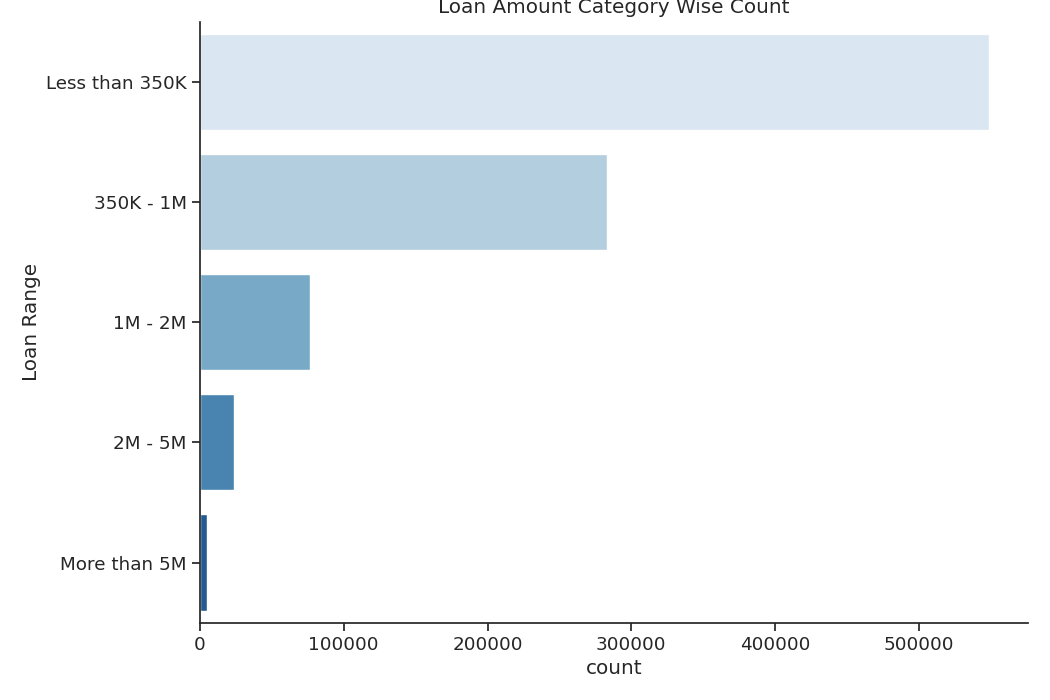

In [32]:
# Visualizing the loan category data
sns.catplot(data = ppp_df, y = 'LoanRange', kind = 'count', palette = 'Blues', height = 7, aspect = 1.5)
plt.title('Loan Amount Category Wise Count')
plt.ylabel('Loan Range')
plt.show()
%matplot plt


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

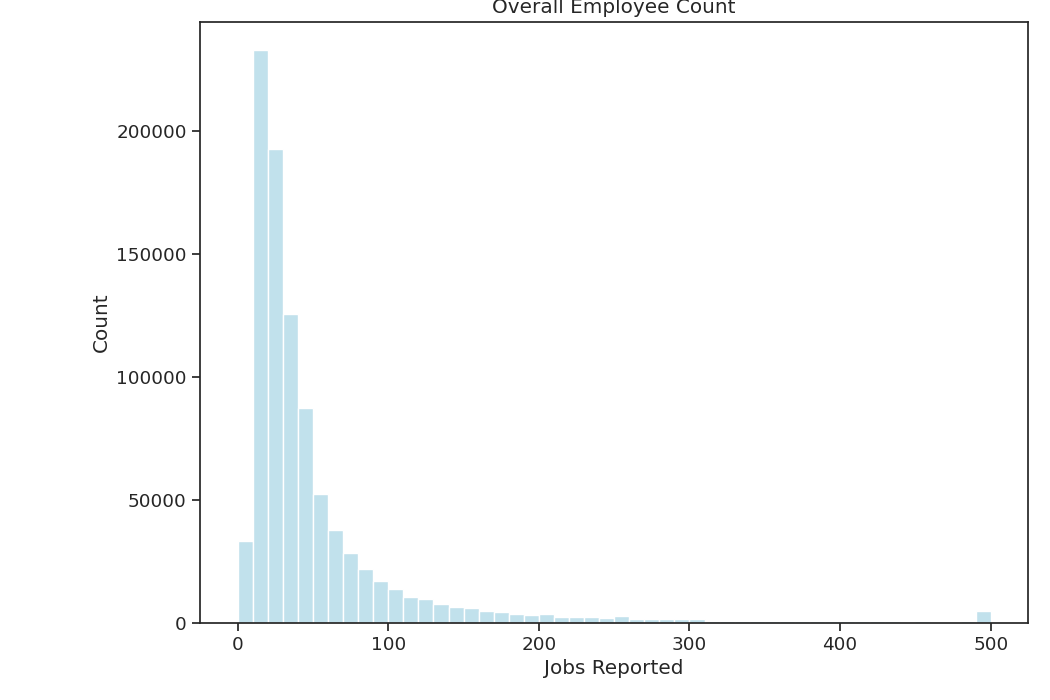

In [33]:
# Reviewing the employees count
plt.clf()
%matplot plt
sns.histplot(data = ppp_df, x = 'JobsReported', bins = 50, color = 'LightBlue')
plt.title('Overall Employee Count')
plt.xlabel('Jobs Reported')
plt.show()
%matplot plt

In [29]:
# Viewing both the data together Loan Category vs Employees Count, grouping on Loan Category
ppp_gb_df = ppp_df.groupby('LoanRange').sum()
ppp_gb_df.reset_index(inplace = True)
ppp_gb_df.head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        LoanRange        LoanNumber  ...  PAYROLL_PROCEED  ForgivenessAmount
0  Less than 350K  2976239523930562  ...     1.199172e+11       1.229292e+11
1       350K - 1M  1535032054833561  ...     1.556550e+11       1.598441e+11
2         1M - 2M   416886090041203  ...     1.063429e+11       1.091439e+11
3         2M - 5M   131585728261406  ...     6.726476e+10       6.971935e+10
4    More than 5M    26470865456872  ...     3.193854e+10       3.296884e+10

[5 rows x 8 columns]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

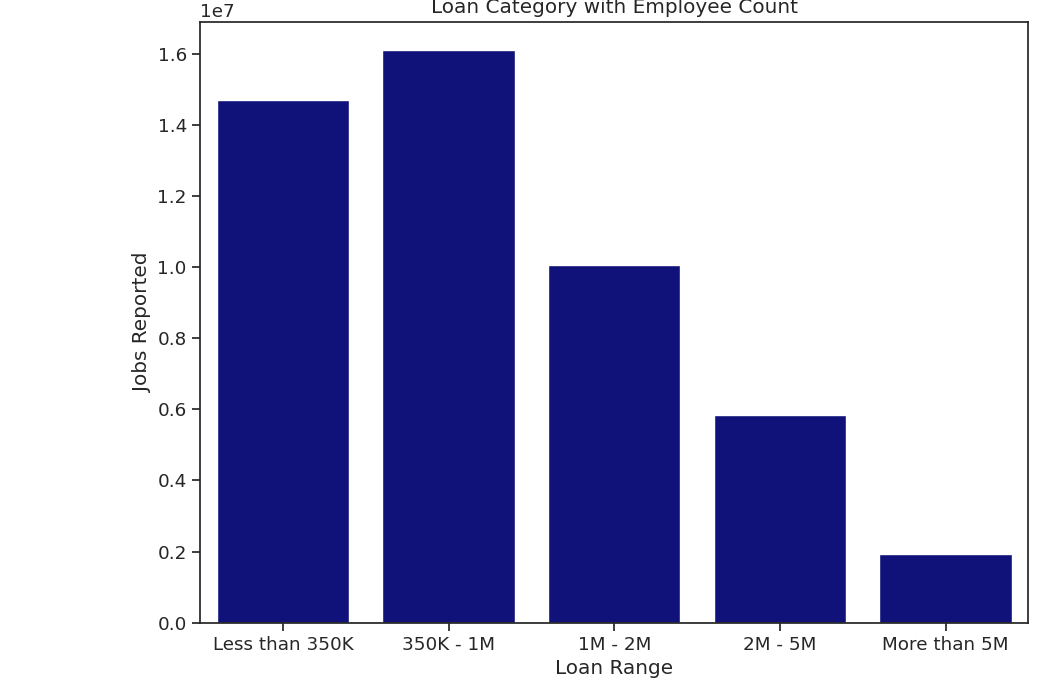

In [34]:
# Vizualizing Loan Category with Employees Count
sns.barplot(data = ppp_gb_df, x = 'LoanRange', y = 'JobsReported', color = 'darkblue')
plt.title('Loan Category with Employee Count')
plt.ylabel('Jobs Reported')
plt.xlabel('Loan Range')
plt.show()
%matplot plt

In [35]:
# Looking at the state details of the borrower.
ppp_state_df = ppp_df.groupby('BorrowerState').sum()
ppp_state_df.reset_index(inplace = True)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
# Sorting state wise highest loan borrowers.
ppp_state_df.sort_values('CurrentApprovalAmount', ascending = False)[:5]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   BorrowerState       LoanNumber  ...  PAYROLL_PROCEED  ForgivenessAmount
5             CA  666498353107529  ...     6.408947e+10       6.553636e+10
37            NY  373255795202076  ...     3.831668e+10       3.961385e+10
47            TX  400637859104914  ...     3.740447e+10       3.875308e+10
10            FL  297285033729557  ...     2.567849e+10       2.636388e+10
16            IL  209927834119362  ...     2.128723e+10       2.235525e+10

[5 rows x 8 columns]

In [38]:
# Vizualizing the state data on map plot by plotly.
px.choropleth(ppp_state_df, locations = 'BorrowerState', locationmode = 'USA-states', scope = 'usa', 
              color = 'CurrentApprovalAmount', color_continuous_scale = 'plasma_r',
              title = 'State wise loan amount borrowed', labels = {'BorrowerState': 'State', 'CurrentApprovalAmount': 'Total Loan Amount'})


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': 'State=%{location}<br>Total Loan Amount=%{z}<extra></extra>',
              'locationmode': 'USA-states',
              'locations': array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                                  'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                                  'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                                  'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX',
                                  'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': array([1.27488930e+09, 5.45661802e+09, 2.75249195e+09, 4.23041659e+06,
                          7.76609502e+09, 6.59087346e+10, 9.64282348e+09, 6.51944971e+09,
                      

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

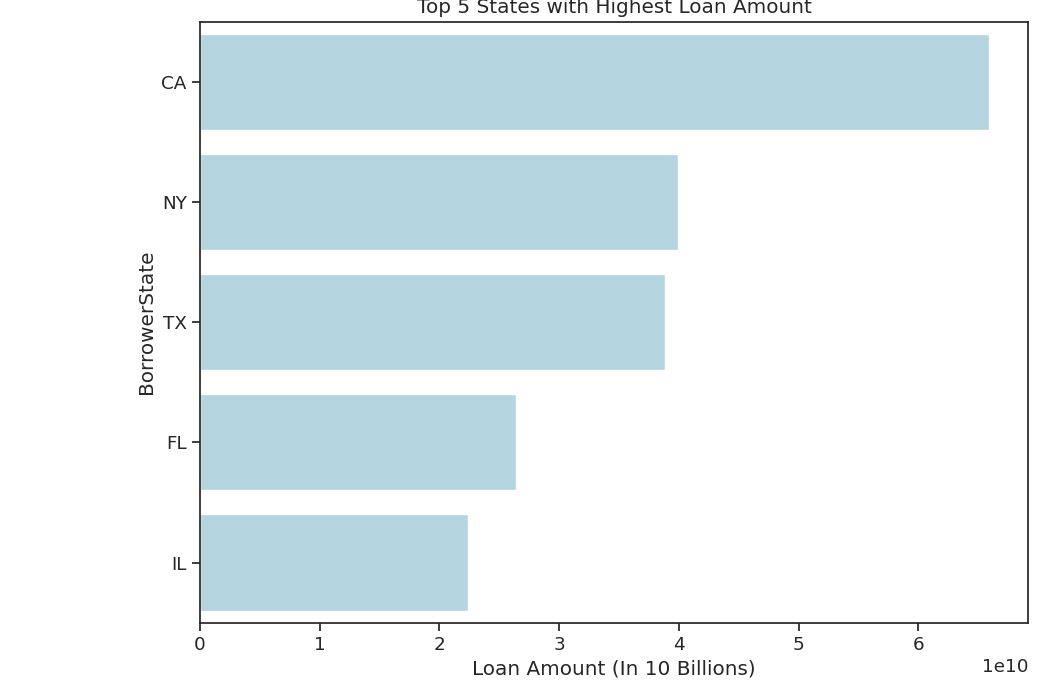

In [41]:
# Viewing the top 5 states on a bar plot.
plt.clf()
%matplot plt
sns.barplot(data = ppp_state_df, x = 'CurrentApprovalAmount', y = 'BorrowerState', 
            order = ppp_state_df.sort_values('CurrentApprovalAmount', ascending = False)[:5]['BorrowerState'],
           color = 'LightBlue')
plt.title('Top 5 States with Highest Loan Amount')
plt.xlabel('Loan Amount (In 10 Billions)')
plt.show()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

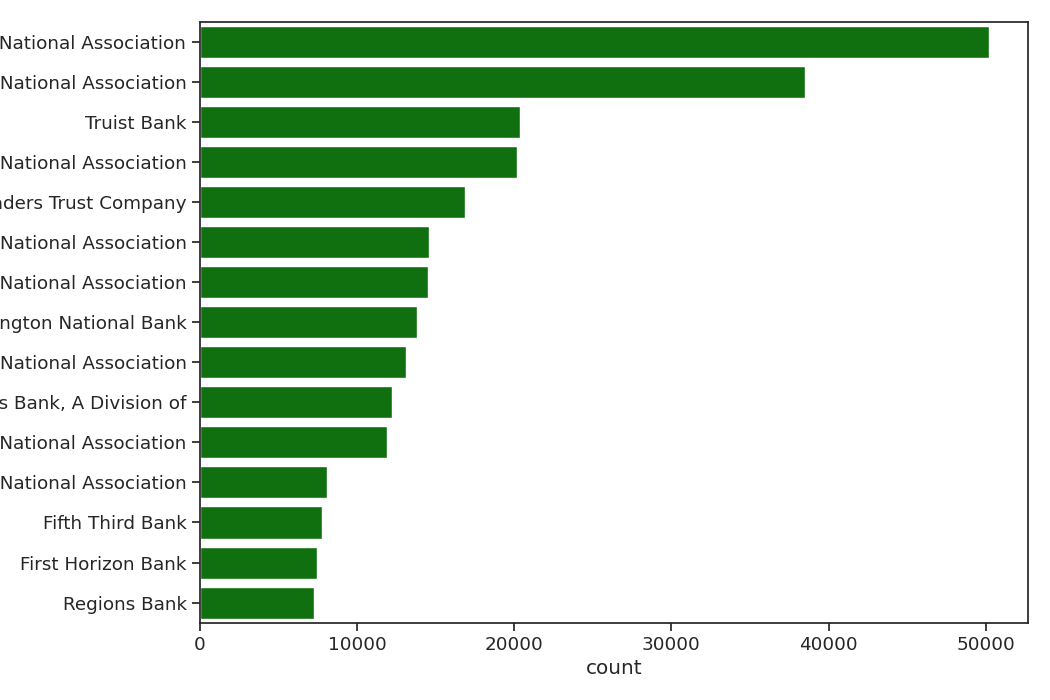

In [43]:
# Checking the top Loan Lenders
plt.clf()
%matplot plt
sns.countplot(data = ppp_df, y = 'OriginatingLender', order = ppp_df['OriginatingLender'].value_counts().index[:15], color = 'Green')
plt.show()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

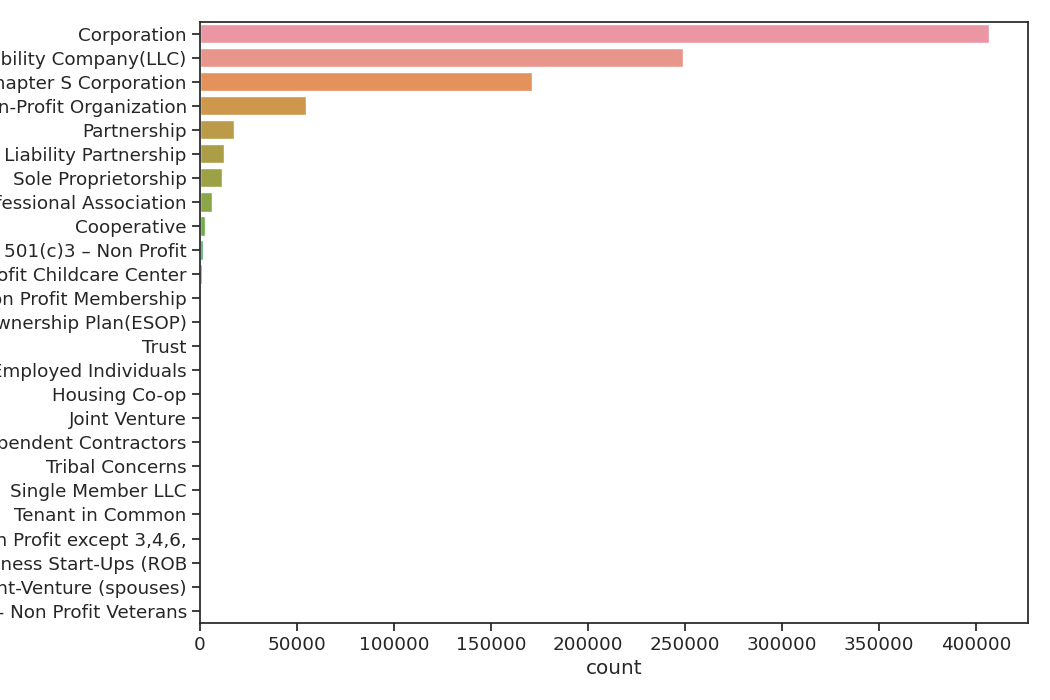

In [44]:
# Looking at which business type has borrowed Loan
plt.clf()
%matplot plt
sns.countplot(data = ppp_df, y = 'BusinessType', order = ppp_df['BusinessType'].value_counts().index)
plt.show()
%matplot plt

In [45]:
# Filtering
ppp_business_df = ppp_df[ppp_df['BusinessType'].isin(['Corporation', 'Limited  Liability Company(LLC)','Subchapter S Corporation', 'Non-Profit Organization'])]

# Sorting as per the date approved
ppp_business_df = ppp_business_df.sort_values(['DateApproved']).reset_index(drop = True)

# Grouping the data as per approved date and business type on count and cumulative sum aggregate function
ppp_biz_count_df = ppp_business_df.groupby(['DateApproved', 'BusinessType']).count().groupby(level = -1).cumsum().reset_index()

# Grouping the data as per approved date and business type on sum aggregate function
ppp_biz_sum_df = ppp_business_df.groupby(['DateApproved', 'BusinessType']).sum().reset_index()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
ppp_biz_count_df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    DateApproved                     BusinessType  ...  ForgivenessDate  LoanRange
0     2020-04-03                      Corporation  ...             4425       4425
1     2020-04-03  Limited  Liability Company(LLC)  ...             2450       2450
2     2020-04-03          Non-Profit Organization  ...              391        391
3     2020-04-03         Subchapter S Corporation  ...             1437       1437
4     2020-04-04                      Corporation  ...            11550      11550
..           ...                              ...  ...              ...        ...
934   2021-06-30                      Corporation  ...           406618     406618
935   2021-06-30  Limited  Liability Company(LLC)  ...           249053     249053
936   2021-06-30          Non-Profit Organization  ...            54878      54878
937   2021-06-30         Subchapter S Corporation  ...           170959     170959
938   2021-07-19                      Corporation  ...           406619     406619

[93

In [47]:
ppp_biz_sum_df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    DateApproved  ... ForgivenessAmount
0     2020-04-03  ...      2.905768e+09
1     2020-04-03  ...      1.399436e+09
2     2020-04-03  ...      3.574730e+08
3     2020-04-03  ...      9.382207e+08
4     2020-04-04  ...      4.696924e+09
..           ...  ...               ...
934   2021-06-30  ...      6.420473e+06
935   2021-06-30  ...      7.607726e+06
936   2021-06-30  ...      6.269863e+06
937   2021-06-30  ...      4.860325e+05
938   2021-07-19  ...      2.016603e+06

[939 rows x 9 columns]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

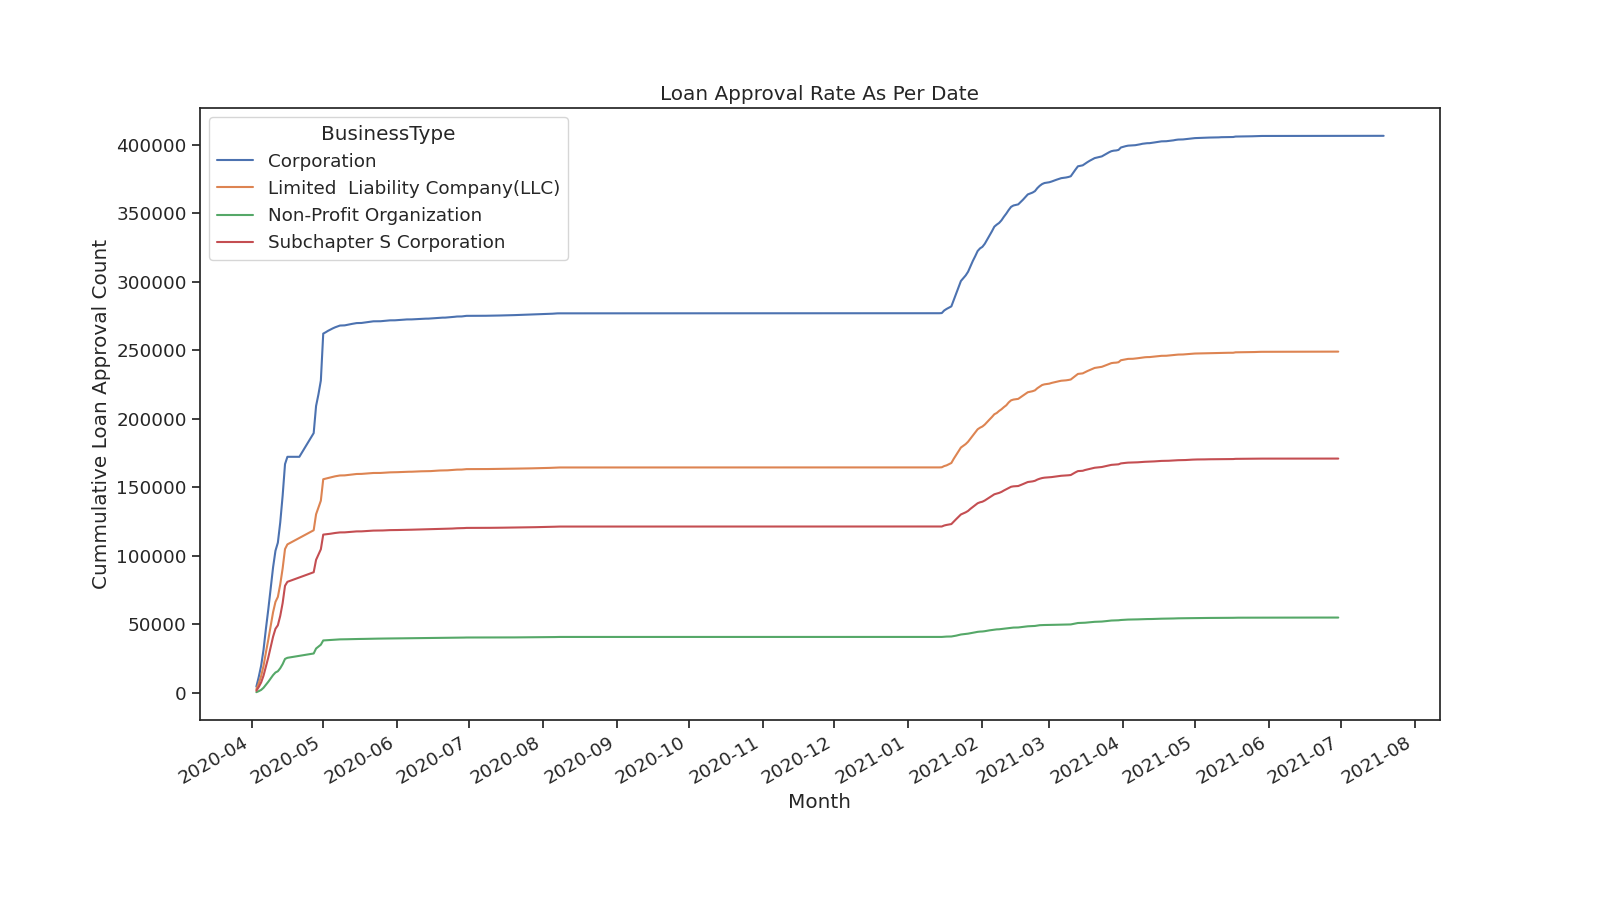

In [48]:
# Business type among the top 4 were reciving loan on which month at what speed of approval
plt.clf()
%matplot plt
fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(ax = ax, data = ppp_biz_count_df, x = 'DateApproved', y = 'CurrentApprovalAmount', hue = 'BusinessType')
ax.set(xlabel = 'Month', ylabel = 'Cummulative Loan Approval Count', title = 'Loan Approval Rate As Per Date')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
fig.autofmt_xdate()
plt.show()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

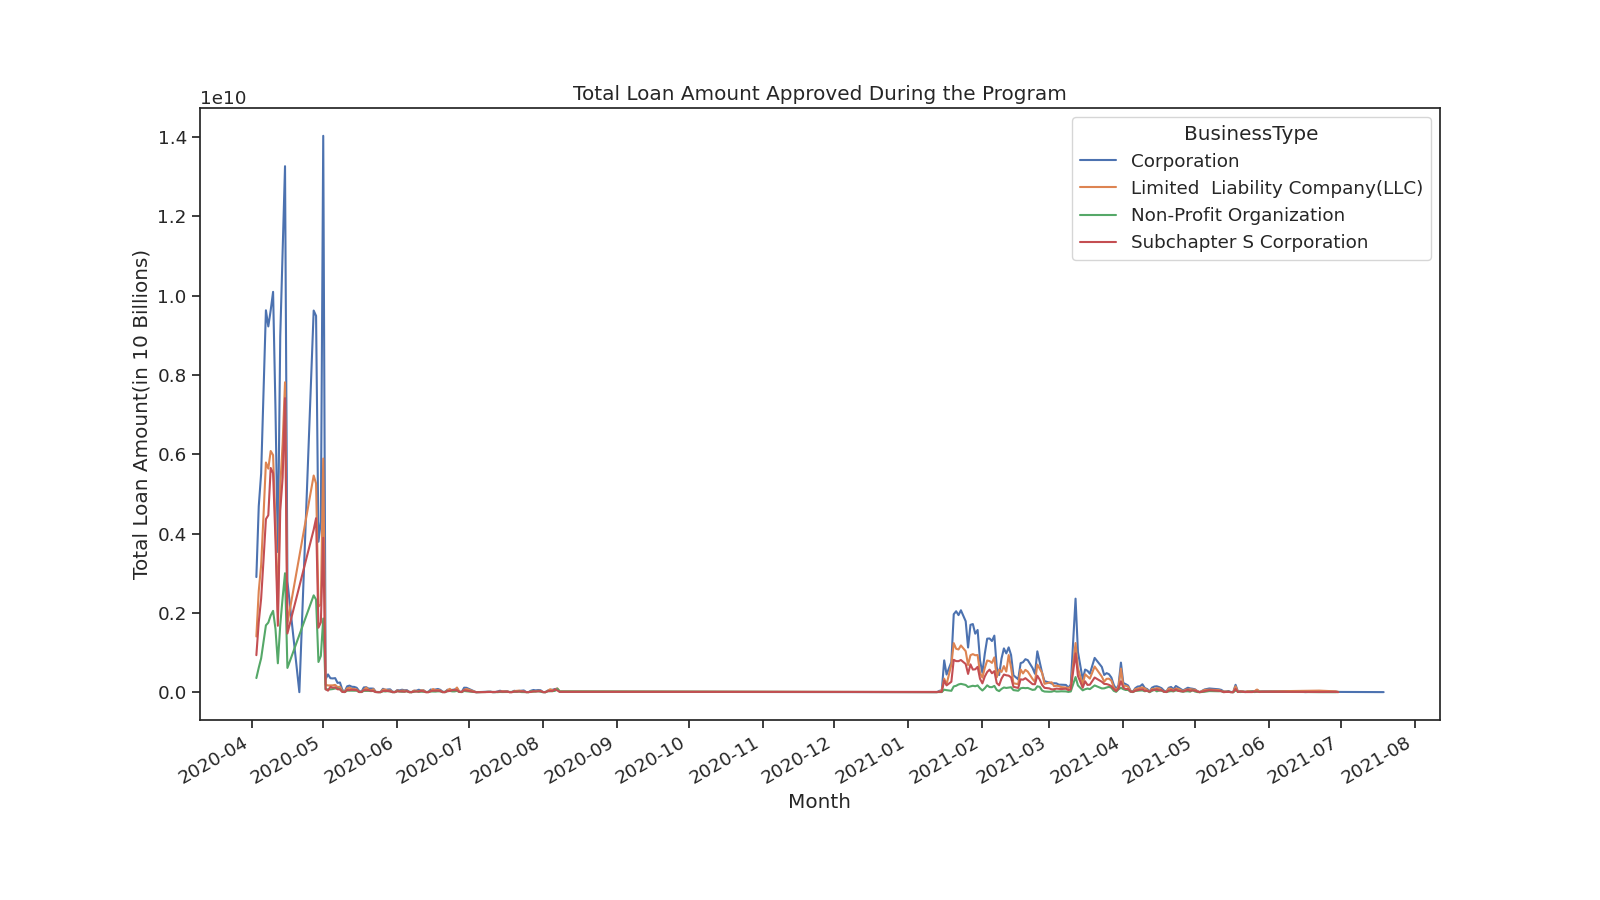

In [49]:
plt.clf()
%matplot plt
fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(ax = ax, data = ppp_biz_sum_df, x = 'DateApproved', y = 'CurrentApprovalAmount', hue = 'BusinessType')
ax.set(xlabel = 'Month', ylabel = 'Total Loan Amount(in 10 Billions)', title = 'Total Loan Amount Approved During the Program')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
fig.autofmt_xdate()
plt.show()
%matplot plt

# ***Modeling***

In [50]:
# Quickly check the data set 
ppp_df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        LoanNumber DateApproved  ... ForgivenessDate       LoanRange
0       5502308207   2020-08-08  ...      2021-06-11    More than 5M
1       6110847106   2020-04-14  ...      2021-07-13    More than 5M
2       4539098204   2020-08-06  ...      2022-06-22    More than 5M
3       5120868804   2021-04-17  ...      2022-09-13    More than 5M
4       6650277102   2020-04-14  ...      2021-05-18    More than 5M
...            ...          ...  ...             ...             ...
936366  4395967002   2020-04-03  ...      2020-12-09  Less than 350K
936367  6985647108   2020-04-14  ...      2020-11-03  Less than 350K
936368  7996438405   2021-02-12  ...      2021-08-17  Less than 350K
936369  9054647103   2020-04-15  ...      2022-02-23  Less than 350K
936370  9184687004   2020-04-09  ...      2021-09-22  Less than 350K

[936371 rows x 20 columns]

In [51]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:
# Create Spark data frame
# Create a SparkSession
spark = SparkSession.builder.appName("Pandas to Spark").getOrCreate()

# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(ppp_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
# First, we just use some numeric variables to build a simple model.
loan_df = spark_df.select(col('CurrentApprovalAmount').cast('double'),
                        col('Term').cast('double'),
                        col('JobsReported').cast('double'),
                        col('PAYROLL_PROCEED').cast('double'))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:
# Split data into training and testing datasets
train_data, test_data = loan_df.randomSplit([0.8, 0.2], seed=42)

# Create feature vector column
assembler = VectorAssembler(inputCols=['Term', 'JobsReported', 'PAYROLL_PROCEED'], outputCol='features')
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

# Fit linear regression model
lr = LinearRegression(featuresCol='features', labelCol='CurrentApprovalAmount', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_data)

# Evaluate model on testing data
evaluator = RegressionEvaluator(labelCol='CurrentApprovalAmount', predictionCol='prediction', metricName='mse')
mse = evaluator.evaluate(lr_model.transform(test_data))
print('MSE: ', mse)
# Evaluate model on testing data
evaluator = RegressionEvaluator(labelCol='CurrentApprovalAmount', predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(lr_model.transform(test_data))
print('R-squared: ', r2)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

MSE:  6623095584.294244
R-squared:  0.9878116352922075

In [55]:
# The R-squred is too good to be true. Exclude that and run it again.
loan_df = spark_df.select(col('CurrentApprovalAmount').cast('double'),
                        col('Term').cast('double'),
                        col('JobsReported').cast('double')
                        )

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [56]:
# Split data into training and testing datasets
train_data, test_data = loan_df.randomSplit([0.8, 0.2], seed=42)

# Create feature vector column
assembler = VectorAssembler(inputCols=['Term', 'JobsReported'], outputCol='features')
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

# Fit linear regression model
lr = LinearRegression(featuresCol='features', labelCol='CurrentApprovalAmount', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_data)

# Evaluate model on testing data
evaluator = RegressionEvaluator(labelCol='CurrentApprovalAmount', predictionCol='prediction', metricName='mse')
mse = evaluator.evaluate(lr_model.transform(test_data))
print('MSE: ', mse)
# Evaluate model on testing data
evaluator = RegressionEvaluator(labelCol='CurrentApprovalAmount', predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(lr_model.transform(test_data))
print('R-squared: ', r2)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

MSE:  232709024248.60272
R-squared:  0.5717497320946884

Discussion:
- Influence of the 'PAYROLL_PROCEED' variable. Make it easier to predict the amount. Should exclude that variable.**bold text**

In [57]:
ppp_df.nunique()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

LoanNumber                936371
DateApproved                 242
ProcessingMethod               2
BorrowerName              829735
BorrowerState                 56
LoanStatus                     2
Term                          89
InitialApprovalAmount     380103
CurrentApprovalAmount     380190
ServicingLenderName         4179
RuralUrbanIndicator            2
HubzoneIndicator               2
BusinessAgeDescription         5
JobsReported                 501
PAYROLL_PROCEED           439052
BusinessType                  25
OriginatingLender           4196
ForgivenessAmount         888209
ForgivenessDate              532
LoanRange                      5
dtype: int64

In [58]:
# Preparation 
ppp_df_modeling = ppp_df

# Modify Businesstype, keep 4 main categories and make the rest into 'others'
# create a list of values to keep
values_to_keep = ['Limited  Liability Company(LLC)', 'Non-Profit Organization', 'Corporation', 'Subchapter S Corporation']
# replace values not in the list with 'others'
ppp_df_modeling['BusinessType'] = ppp_df_modeling['BusinessType'].apply(lambda x: x if x in values_to_keep else 'others')
ppp_df_modeling.BusinessType.nunique()

# Modify OriginatingLender, keep 2 main categories and make the rest into 'others'
values_to_keep = ['JPMorgan Chase Bank, National Association', 'Bank of America, National Association']
# replace values not in the list with 'others'
ppp_df_modeling['OriginatingLender'] = ppp_df_modeling['OriginatingLender'].apply(lambda x: x if x in values_to_keep else 'others')
ppp_df_modeling.OriginatingLender.nunique()

# convert dtype foe LoanRange
ppp_df_modeling['LoanRange'] = ppp_df_modeling['LoanRange'].astype('object')


# select cols that used for modeling
ppp_df_modeling = ppp_df_modeling.iloc[:, [2,4,5,6,8,10,11,12,13,15,16]]
ppp_df_modeling.info()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936371 entries, 0 to 936370
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProcessingMethod        936371 non-null  object 
 1   BorrowerState           936371 non-null  object 
 2   LoanStatus              936371 non-null  object 
 3   Term                    936371 non-null  int32  
 4   CurrentApprovalAmount   936371 non-null  float64
 5   RuralUrbanIndicator     936371 non-null  object 
 6   HubzoneIndicator        936371 non-null  object 
 7   BusinessAgeDescription  936371 non-null  object 
 8   JobsReported            936371 non-null  float64
 9   BusinessType            936371 non-null  object 
 10  OriginatingLender       936371 non-null  object 
dtypes: float64(2), int32(1), object(8)
memory usage: 75.0+ MB

In [59]:
ppp_df_modeling.nunique()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

ProcessingMethod               2
BorrowerState                 56
LoanStatus                     2
Term                          89
CurrentApprovalAmount     380190
RuralUrbanIndicator            2
HubzoneIndicator               2
BusinessAgeDescription         5
JobsReported                 501
BusinessType                   5
OriginatingLender              3
dtype: int64

In [60]:
# Now, we can consider the categorical data
## Preparation - encoding for the non-numerical cols.
categorical_cols = ppp_df_modeling.select_dtypes(include=['object']).columns.tolist()
ppp_df_modeling = pd.get_dummies(ppp_df_modeling, columns=categorical_cols)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [61]:
ppp_df_modeling.head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Term  ...  OriginatingLender_others
0    60  ...                         1
1    24  ...                         1
2    60  ...                         1
3    60  ...                         1
4    24  ...                         1

[5 rows x 80 columns]

In [62]:
ppp_df_modeling.info()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936371 entries, 0 to 936370
Data columns (total 80 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   Term                                                           936371 non-null  int32  
 1   CurrentApprovalAmount                                          936371 non-null  float64
 2   JobsReported                                                   936371 non-null  float64
 3   ProcessingMethod_PPP                                           936371 non-null  uint8  
 4   ProcessingMethod_PPS                                           936371 non-null  uint8  
 5   BorrowerState_AK                                               936371 non-null  uint8  
 6   BorrowerState_AL                                               936371 non-null  uint8  
 7   BorrowerState_AR                               

In [ ]:
# Export those as a new csv file.
# ppp_df_modeling.to_csv('/content/drive/MyDrive/CU BOULDER/public_150k_plus_forModeling.csv')

In [63]:
# Use spark to build a linear regression
spark = SparkSession.builder \
        .appName("PPP Loan Regressor") \
        .getOrCreate()
ppp_spark_df = spark.createDataFrame(ppp_df_modeling)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [64]:
# Split data
feature_cols = ppp_spark_df.columns
feature_cols.remove("CurrentApprovalAmount")
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(ppp_spark_df)
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train lm model
lr = LinearRegression(featuresCol="features", labelCol="CurrentApprovalAmount")
lr_model = lr.fit(train_data)

# predict
predictions = lr_model.transform(test_data)

## Evaluate
# Compute the RMSE
rmse_evaluator = RegressionEvaluator(labelCol='CurrentApprovalAmount', predictionCol='prediction', metricName='rmse')
rmse = rmse_evaluator.evaluate(predictions)

# Compute the R-squared
r2_evaluator = RegressionEvaluator(labelCol='CurrentApprovalAmount', predictionCol='prediction', metricName='r2')
r2 = r2_evaluator.evaluate(predictions)

print("RMSE: {:.3f}".format(rmse))
print("R-squared: {:.3f}".format(r2))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

RMSE: 478929.936
R-squared: 0.578

In [65]:
# Try another regressor
# import necessary libraries
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler

# create GBT regressor object
gbt = GBTRegressor(featuresCol='features', labelCol='CurrentApprovalAmount', maxIter=10)

# fit the model on the training data
gbt_model = gbt.fit(train_data)

# make predictions on the testing data
predictions = gbt_model.transform(test_data)

# evaluate the model using RMSE and R2 metrics
evaluator = RegressionEvaluator(
    labelCol='CurrentApprovalAmount',
    predictionCol='prediction',
    metricName='rmse')

rmse = evaluator.evaluate(predictions)
print("GBT RMSE:", rmse)

evaluator = RegressionEvaluator(
    labelCol='CurrentApprovalAmount',
    predictionCol='prediction',
    metricName='r2')

r2 = evaluator.evaluate(predictions)
print("GBT R-squared:", r2)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

GBT RMSE: 483874.24035259185
GBT R-squared: 0.5691343669020112

In [66]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Assemble all the features into a vector
assembler = VectorAssembler(inputCols=[col for col in ppp_df_modeling.columns if col != 'CurrentApprovalAmount'],
                            outputCol='features')
ppp_df_modeling = assembler.transform(ppp_spark_df)

# Normalize the data
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(ppp_df_modeling)
ppp_df_modeling = scaler_model.transform(ppp_df_modeling)

# Train KMeans clustering model
kmeans = KMeans(featuresCol='scaled_features', k=5, seed=1)
kmeans_model = kmeans.fit(ppp_df_modeling)

# Predict the cluster for each data point
predicted_clusters = kmeans_model.transform(ppp_df_modeling)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

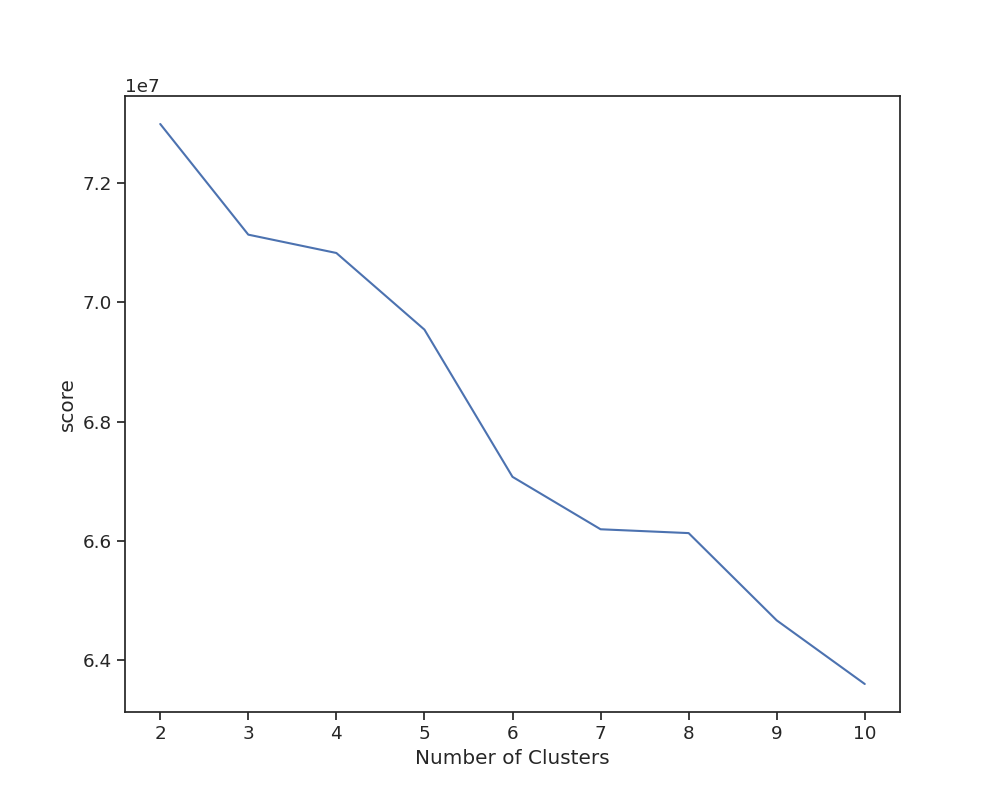

In [67]:
from pyspark.ml.evaluation import ClusteringEvaluator

# Assemble all the features into a vector

assembled_data = assembler.transform(ppp_spark_df)

silhouette_scores=[]
evaluator = ClusteringEvaluator(featuresCol='scaled_features', \
metricName='silhouette', distanceMeasure='squaredEuclidean')

for K in range(2,11):
  kmeans = KMeans(featuresCol='scaled_features', k=K, seed=1)
  kmeans_model = kmeans.fit(ppp_df_modeling)
  # predicted_clusters = kmeans_model.transform(ppp_df_modeling)
  # evaluation_score=evaluator.evaluate(predicted_clusters)
  silhouette_scores.append(kmeans_model.summary.trainingCost)
  # silhouette_scores.append(evaluation_score)

plt.clf()
%matplot plt
fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,11),silhouette_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('score')
plt.show()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

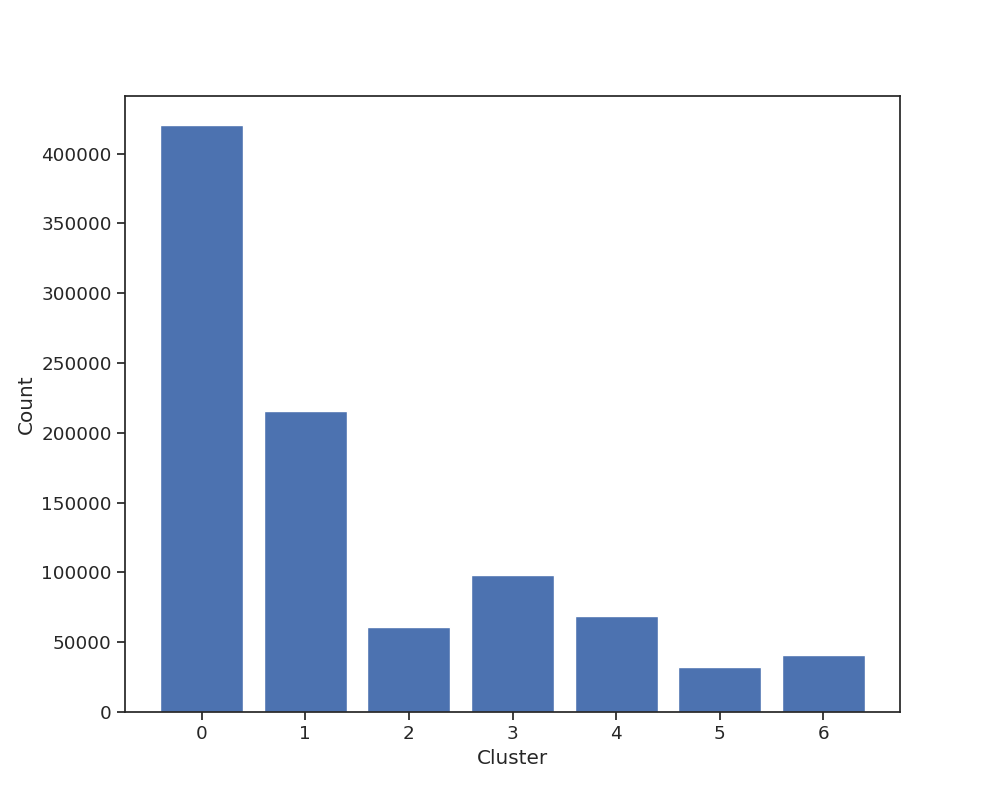

In [68]:
from pyspark.ml.feature import PCA
from pyspark.ml.clustering import KMeans


# Define PCA object
pca = PCA(k=2, inputCol="scaled_features", outputCol="pca_features")

# Fit PCA model on data
pca_model = pca.fit(ppp_df_modeling)

# Transform data using fitted PCA model
pca_df = pca_model.transform(ppp_df_modeling)

# Define KMeans object
kmeans = KMeans(featuresCol='pca_features', k=7, seed=1)

# Fit KMeans model on transformed data
kmeans_model = kmeans.fit(pca_df)

# Predict the cluster for each data point
predicted_clusters = kmeans_model.transform(pca_df)

# Count the number of observations in each cluster
cluster_counts = predicted_clusters.groupBy('prediction').count().orderBy('prediction')

# Convert the Spark dataframe to a Pandas dataframe for plotting
pd_df = cluster_counts.toPandas()

# Plot the bar plot of cluster counts
plt.clf()
%matplot plt
fig, ax = plt.subplots()
bars = ax.bar(pd_df['prediction'], pd_df['count'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()
%matplot plt


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

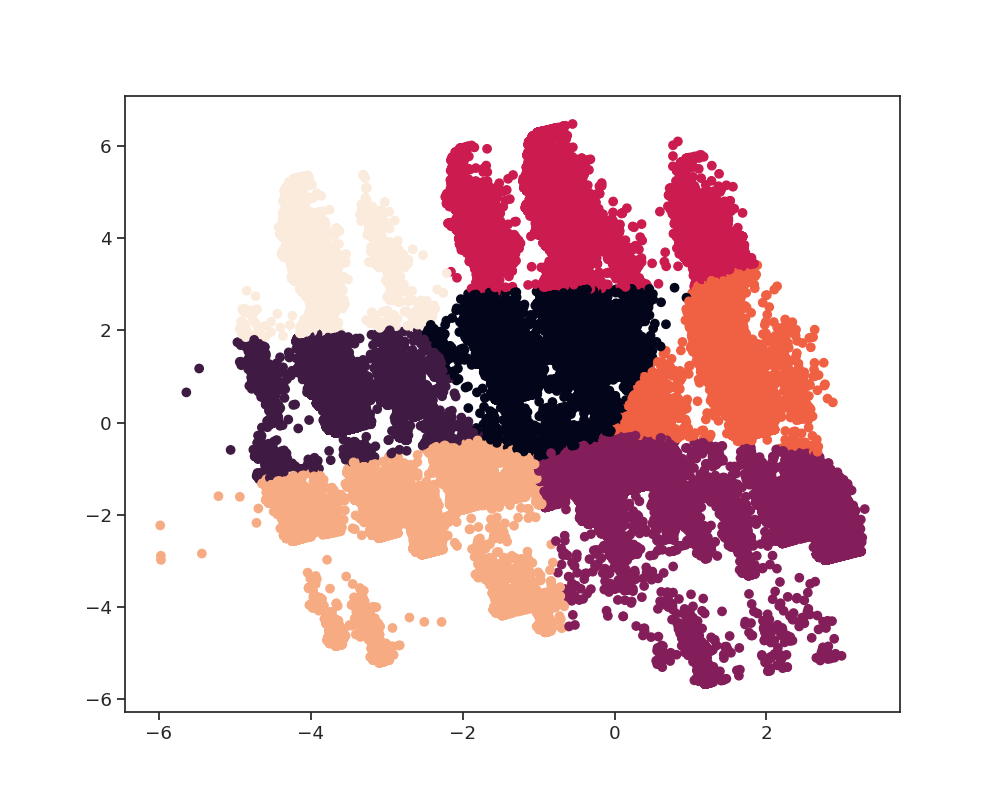

In [69]:
# Extract PCA features and predicted cluster labels
pca_features = predicted_clusters.select("pca_features").rdd.map(lambda row: row[0]).collect()
cluster_labels = predicted_clusters.select("prediction").rdd.map(lambda row: row[0]).collect()

# Visualize the clusters using matplotlib
plt.clf()
%matplot plt
x = np.array(pca_features)[:, 0]
y = np.array(pca_features)[:, 1]
plt.scatter(x, y, c=cluster_labels)
plt.show()
%matplot plt

In [70]:
predicted_clusters.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+---------------------+------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------

In [71]:
predicted_clusters.createOrReplaceTempView("cluster")
cluster_eda = spark.sql("SELECT prediction, CurrentApprovalAmount, JobsReported, BorrowerState_CA, BorrowerState_IL, BorrowerState_FL, BorrowerState_TX, BorrowerState_NY, BusinessType_Corporation, `BusinessType_Limited  Liability Company(LLC)`,`BusinessType_Non-Profit Organization`, `BusinessType_Subchapter S Corporation`,BusinessType_others,`OriginatingLender_Bank of America, National Association`, `OriginatingLender_JPMorgan Chase Bank, National Association`,OriginatingLender_others FROM cluster")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [72]:
from pyspark.sql.functions import avg,count,round

df = cluster_eda.groupBy("prediction").agg(avg("CurrentApprovalAmount").alias("avg_approval_amount"), 
                             avg("JobsReported").alias("avg_jobs_reported"), 
                             avg(col("BorrowerState_CA")).alias("CA"), 
                             avg(col("BorrowerState_IL")).alias("IL"), 
                             avg(col("BorrowerState_FL")).alias("FL"), 
                             avg(col("BorrowerState_TX")).alias("TX"), 
                             avg(col("BorrowerState_NY")).alias("NY"), 
                             avg(col("BusinessType_Corporation")).alias("Corporation"), 
                             avg(col("BusinessType_Limited  Liability Company(LLC)")).alias("LLC"), 
                             avg(col("BusinessType_Non-Profit Organization")).alias("NGO"), 
                             avg(col("BusinessType_Subchapter S Corporation")).alias("Subchapter_s_corp"), 
                             avg(col("BusinessType_others")).alias("Others"), 
                             avg(col("OriginatingLender_Bank of America, National Association")).alias("Bank of America"), 
                             avg(col("OriginatingLender_JPMorgan Chase Bank, National Association")).alias("JPMorgan"), 
                             avg(col("OriginatingLender_others")).alias("Other_lenders"), 
                             count("*").alias("prediction_count")).orderBy("prediction")
df = df.select([round(c, 4).alias(c) for c in df.columns])
df.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------------+-----------------+------+------+------+------+------+-----------+------+------+-----------------+------+---------------+--------+-------------+----------------+
|prediction|avg_approval_amount|avg_jobs_reported|    CA|    IL|    FL|    TX|    NY|Corporation|   LLC|   NGO|Subchapter_s_corp|Others|Bank of America|JPMorgan|Other_lenders|prediction_count|
+----------+-------------------+-----------------+------+------+------+------+------+-----------+------+------+-----------------+------+---------------+--------+-------------+----------------+
|         0|        587583.8003|          55.1563|0.1411|0.0437|0.0673|0.0852|0.0614|     0.4331|0.2501| 0.066|           0.1877|0.0632|         4.0E-4|  0.0083|       0.9912|          420223|
|         1|        442499.1161|          42.5122|0.1481|0.0464|0.0632|0.0826|0.0749|     0.4402|0.2893|0.0487|           0.1638| 0.058|         0.0014|  0.0025|       0.9961|          215663|
|         2|        540256.8739|   